# Data Exploration 

By: **Rodrigo Hernández Mota**


Consult the dataset [here](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset).

**Description**

This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

Content:
* ID: ID of each client
* LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
* SEX: Gender (1=male, 2=female)
* EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* MARRIAGE: Marital status (1=married, 2=single, 3=others)
* AGE: Age in years
* PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two * * months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
* PAY_2: Repayment status in August, 2005 (scale same as above)
* PAY_3: Repayment status in July, 2005 (scale same as above)
* PAY_4: Repayment status in June, 2005 (scale same as above)
* PAY_5: Repayment status in May, 2005 (scale same as above)
* PAY_6: Repayment status in April, 2005 (scale same as above)
* BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
* BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
* BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
* BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
* BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
* BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
* PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
* default.payment.next.month: Default payment (1=yes, 0=no)



## Libraries

In [3]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

## Read dataset

In [4]:
raw_data = pd.read_csv('data/UCI_Credit_Card.csv')
raw_data['ones'] = 1
raw_data.columns = [col if col != 'default.payment.next.month' else 'DEFAULT_NEXT_MONTH' for col in raw_data.columns]

In [26]:
description = """

Shape of data: {data_shape}

Description: 
    This dataset contains information on default payments, demographic factors, credit data,
    history of payment, and bill statements of credit card clients in 
    Taiwan from April 2005 to September 2005.

Are there nans? {has_nans}

Column Names:
""".format(
    data_shape=raw_data.shape,
    has_nans=raw_data.isnull().values.any())

print(description)
for col in raw_data.columns:
    print('\t {}'.format(col))



Shape of data: (30000, 28)

Description: 
    This dataset contains information on default payments, demographic factors, credit data,
    history of payment, and bill statements of credit card clients in 
    Taiwan from April 2005 to September 2005.

Are there nans? False

Column Names:

	 ID
	 LIMIT_BAL
	 SEX
	 EDUCATION
	 MARRIAGE
	 AGE
	 PAY_0
	 PAY_2
	 PAY_3
	 PAY_4
	 PAY_5
	 PAY_6
	 BILL_AMT1
	 BILL_AMT2
	 BILL_AMT3
	 BILL_AMT4
	 BILL_AMT5
	 BILL_AMT6
	 PAY_AMT1
	 PAY_AMT2
	 PAY_AMT3
	 PAY_AMT4
	 PAY_AMT5
	 PAY_AMT6
	 DEFAULT_NEXT_MONTH
	 ones
	 AVERAGE_BILL
	 AVERAGE_PAYMENT


In [9]:
# Make columns sub-sets
repayment_labels = list(filter(lambda col: ('PAY' in col) and ('AMT' not in col), raw_data.columns))
bill_statement_labels =  list(filter(lambda col: ('BILL' in col), raw_data.columns))
prev_payment_labels = list(filter(lambda col: ('PAY' in col) and ('AMT' in col), raw_data.columns))


In [10]:
# Get index for default data
default_filer = (raw_data.DEFAULT_NEXT_MONTH == 1)

## Dataset

In [17]:
raw_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_NEXT_MONTH,ones
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,1
3,4,50000.0,2,2,1,37,0,0,0,0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,1
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,1


## Analysis per variable

In [11]:
def perform_pie_plot(df, col, index_names=None, name=None):
    temp = raw_data.groupby(col).ones.sum() / raw_data.ones.sum()
    temp.index = temp.index if not index_names else [index_names[x] for x in temp.index]
    temp.name = temp.name if not name else name
    temp.plot.pie(figsize=(5,5))
    plt.title(col)
    plt.show()
    print(temp)
    print()

def print_default_stats(df, filtered, col, index_names=None, name=None, desc=''):
    temp = raw_data[filtered].groupby(col).ones.sum() / raw_data[filtered].ones.sum()
    temp.index = temp.index if not index_names else [index_names[x] for x in temp.index]
    temp.name = temp.name if not name else name
    print(desc)
    print(temp)

### Sex

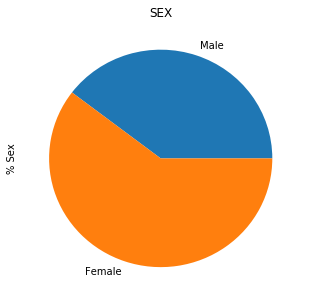

Male      0.396267
Female    0.603733
Name: % Sex, dtype: float64

Default customers
Male      0.432942
Female    0.567058
Name: % Sex default, dtype: float64


In [12]:
# Sex variable
sex_vars = {1: 'Male', 2: 'Female'}
perform_pie_plot(raw_data, 'SEX', sex_vars, '% Sex')
print_default_stats(
    df=raw_data,
    filtered=default_filer, 
    col='SEX', 
    index_names=sex_vars,
    name='% Sex default',
    desc='Default customers')

### Education

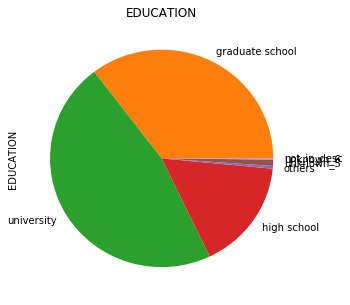

not_in_desc        0.000467
graduate school    0.352833
university         0.467667
high school        0.163900
others             0.004100
unknown_5          0.009333
unknown_6          0.001700
Name: EDUCATION, dtype: float64

Default customers
graduate school    0.306811
university         0.501808
high school        0.186407
others             0.001055
unknown_5          0.002712
unknown_6          0.001206
Name: % Education default, dtype: float64


In [13]:
# EDUCATION VAR
education_vars = {0: 'not_in_desc',
                  1: 'graduate school',
                  2: 'university',
                  3: 'high school', 
                  4: 'others', 
                  5: 'unknown_5', 
                  6:'unknown_6'}
perform_pie_plot(raw_data, 'EDUCATION',
                 education_vars, 
                 'EDUCATION')
print_default_stats(
    df=raw_data,
    filtered=default_filer, 
    col='EDUCATION', 
    index_names=education_vars,
    name='% Education default',
    desc='Default customers')

### Marriage

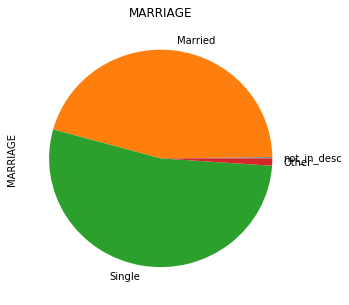

not_in_desc    0.001800
Married        0.455300
Single         0.532133
Other          0.010767
Name: MARRIAGE, dtype: float64

Default customers
not_in_desc    0.000753
Married        0.483122
Single         0.503466
Other          0.012658
Name: % Marriage default, dtype: float64


In [14]:
# MARRIAGE
marriage_vars = {0: 'not_in_desc', 1: 'Married', 2: 'Single', 3: 'Other'}
perform_pie_plot(raw_data, 'MARRIAGE', marriage_vars, 'MARRIAGE')
print_default_stats(
    df=raw_data,
    filtered=default_filer, 
    col='MARRIAGE', 
    index_names=marriage_vars,
    name='% Marriage default',
    desc='Default customers')

### Age

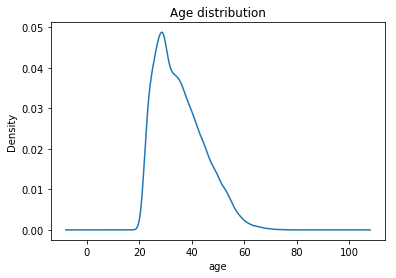

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64


In [15]:
# Age distribution.

raw_data.AGE.plot.kde()
plt.title('Age distribution')
plt.xlabel('age')
plt.show()

print(raw_data.AGE.describe())

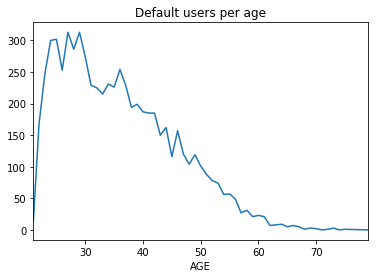

In [16]:
raw_data.groupby("AGE")['DEFAULT_NEXT_MONTH'].sum().plot()
plt.title("Default users per age")
plt.show()

### Balance Limit

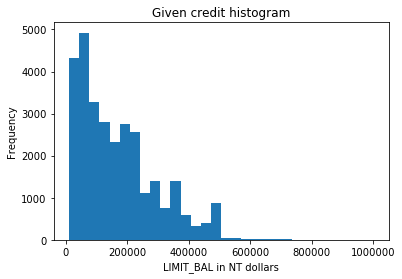

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64


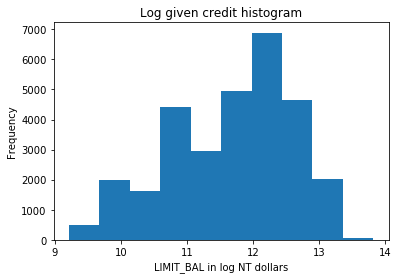

In [18]:
# Limit balanc

raw_data.LIMIT_BAL.plot.hist(bins=30)
plt.title('Given credit histogram')
plt.xlabel('LIMIT_BAL in NT dollars')
plt.show()

print(raw_data.LIMIT_BAL.describe())

raw_data.LIMIT_BAL.apply(np.log).plot.hist()
plt.title('Log given credit histogram')
plt.xlabel('LIMIT_BAL in log NT dollars')
plt.show()

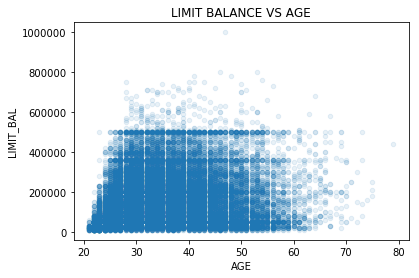

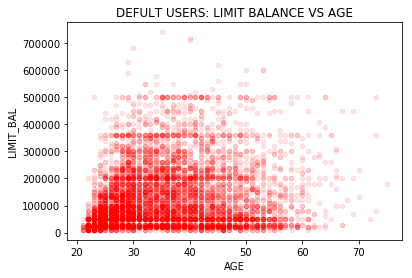

In [19]:
raw_data.plot.scatter(x='AGE', y='LIMIT_BAL', alpha=0.1)
plt.title('LIMIT BALANCE VS AGE')
plt.show()


raw_data.query('DEFAULT_NEXT_MONTH == 1').plot.scatter(x='AGE', y='LIMIT_BAL', alpha=0.1, c='r')
plt.title('DEFULT USERS: LIMIT BALANCE VS AGE')
plt.show()

## Average Bill Statement and Average Payment

In [20]:
def create_norm_func(min_val, max_val):
    return lambda x: (x - min_val) / (max_val - min_val)

In [21]:
raw_data['AVERAGE_BILL'] = raw_data[bill_statement_labels].mean(1)
raw_data['AVERAGE_PAYMENT'] = raw_data[prev_payment_labels].mean(1)

print('\nAverage Bill Statement desc:')
print(raw_data['AVERAGE_BILL'].describe())
print('\nAverage Payment desc:')
print(raw_data['AVERAGE_PAYMENT'].describe())


Average Bill Statement desc:
count     30000.000000
mean      44976.945200
std       63260.721860
min      -56043.166667
25%        4781.333333
50%       21051.833333
75%       57104.416667
max      877313.833333
Name: AVERAGE_BILL, dtype: float64

Average Payment desc:
count     30000.000000
mean       5275.232094
std       10137.946323
min           0.000000
25%        1113.291667
50%        2397.166667
75%        5583.916667
max      627344.333333
Name: AVERAGE_PAYMENT, dtype: float64


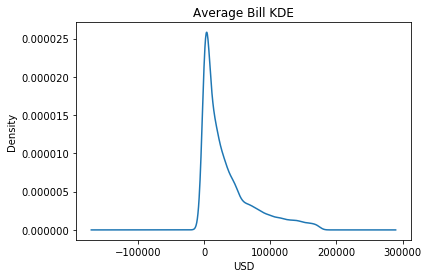

In [22]:
average_billt_without_outliers = raw_data['AVERAGE_BILL'] < np.percentile(raw_data['AVERAGE_BILL'], 95)


raw_data[average_billt_without_outliers].AVERAGE_BILL.plot.kde()
plt.title('Average Bill KDE')
plt.xlabel('USD')
plt.show()



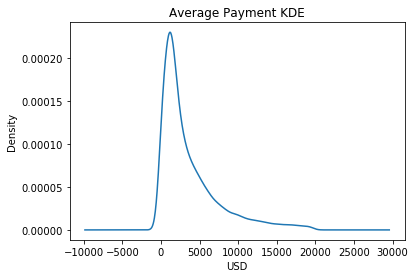

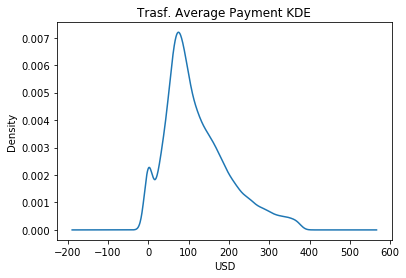

In [23]:
average_payment_without_outliers = raw_data['AVERAGE_PAYMENT'] < np.percentile(raw_data['AVERAGE_PAYMENT'], 95)

raw_data[average_payment_without_outliers].AVERAGE_PAYMENT.plot.kde()
plt.title('Average Payment KDE')
plt.xlabel('USD')
plt.show()

raw_data[average_payment_without_outliers].AVERAGE_PAYMENT.apply(
    lambda x: np.power(x, 3/5), 1
).plot.kde()
plt.title('Trasf. Average Payment KDE')
plt.xlabel('USD')
plt.show()

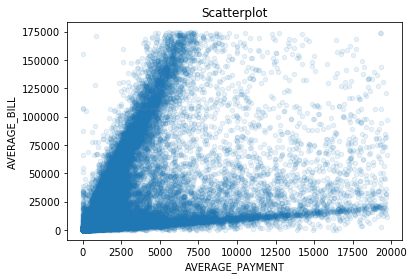

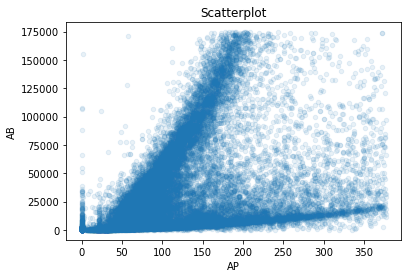

In [24]:
combined_index = [i and j and k for i,j, k in zip(average_billt_without_outliers, average_payment_without_outliers, raw_data.AVERAGE_BILL > 0)]

raw_data[combined_index].plot.scatter(x='AVERAGE_PAYMENT', y='AVERAGE_BILL', alpha=0.1)
plt.title('Scatterplot')
plt.show()


raw_data[combined_index].apply(
    lambda x: pd.Series({'AP': np.power(x.AVERAGE_PAYMENT, 3/5),
                         'AB': x.AVERAGE_BILL}), 1
).plot.scatter(x='AP', y='AB', alpha=0.1)
plt.title('Scatterplot')
plt.show()

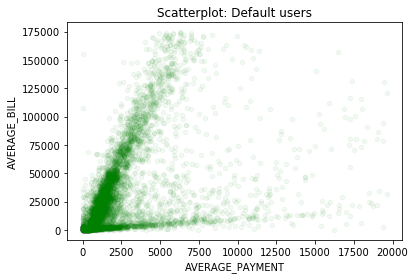

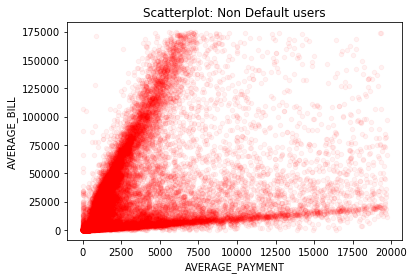

In [25]:
raw_data[combined_index].query('DEFAULT_NEXT_MONTH == 1').plot.scatter(x='AVERAGE_PAYMENT', y='AVERAGE_BILL', alpha=0.05, c='g')
plt.title("Scatterplot: Default users")
plt.show()

raw_data[combined_index].query('DEFAULT_NEXT_MONTH == 0').plot.scatter(x='AVERAGE_PAYMENT', y='AVERAGE_BILL', alpha=0.05, c='r')
plt.title("Scatterplot: Non Default users")
plt.show()